In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

# Проверка ЦПТ - теоремы на примере непрерывного распределения

ЦПТ теорема утвержает, что в распределениии с функцией распределения X~F(X), размера n,
выборочное среднее $x_n$ хорого описывается нормальным распределением $X_n~(EX,\frac{DX}{n})$ с таким же 
мат. ожиданием, что и изначальная случ. величина и с дисперсией, делённой на размер выборки n

### Проверим ЦПТ на примере распределения Парето с параметрами $x_0=1$ и $k=3$

In [23]:
x0 = 1
k = 3
pareto = sts.pareto(k, loc =0, scale=x0)

In [27]:
print(pareto.mean())
print(pareto.std())

1.5
0.866025403784


Теоретическое среднее должно быть равно $\frac{kx_0}{k-1}=3*1/2=1.5$ 
ALLLLRIGHT!

### Численный эксперимент (величина m должна хоршо описываться нормальным распределением со средним =1.5 и дсперсией  $\frac{DX}{n}$)

In [29]:
m_5=[] # Тут вроде всё понятно, просто в массивы соотвествующие заносятся средние значения, пока идёт прогон по выборкам
m_10=[]
m_50=[]
for i in (5,10,50):
    if i ==5:
        for j in range(0,1000):
            m_5.append(pareto.rvs(i).mean())
            j+1
    elif i ==10:
        for j in range(0,1000):
            m_10.append(pareto.rvs(i).mean())
            j+1
    elif i ==50:
        for j in range(0,1000):
            m_50.append(pareto.rvs(i).mean())
            j+1

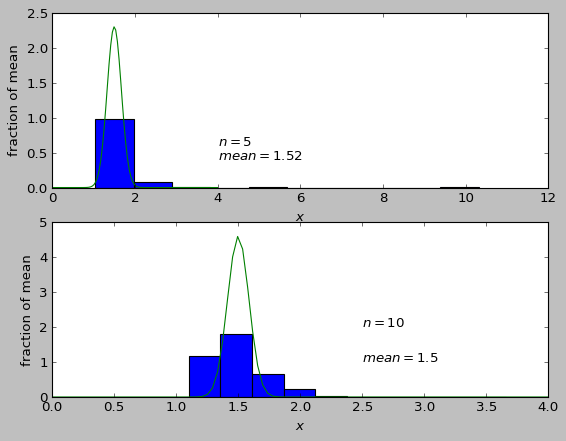

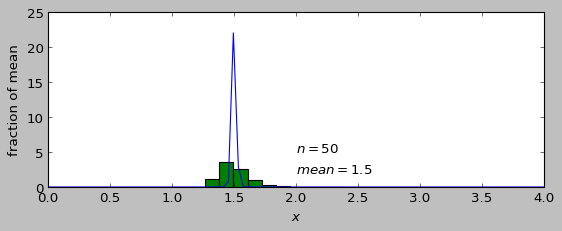

In [68]:
with plt.style.context(('classic')):  # Я знаю, Бро, выглядит не очень. Я хотел наглядные графики, но код получился страшным
    plt.figure(1) #Машия для того, чтобы 3 графика выводились сразу  # Но не переживай, я постараюсь всё объяснить по шагам
    plt.subplot(211)
    plt.hist(m_5, normed=True) # Строим гистограмму средних для выборки из 5 (n=5)
    m_5_norm=sts.norm(pareto.mean(),pareto.std()/5) # Описываем выборочное среднее нормальным распределением с параметрами (EX-парета, DX=DX парета/5)
    x = np.linspace(0,4,100)
    pdf_5 = m_5_norm.pdf(x) #расчитывем плотность этого распределеения
    plt.plot(x, pdf_5) # Строим распределение
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    m_5_mean=np.mean(m_5) # Это расчёт среднего из выборки средних ;) 
    plt.text(4,0.6,r'$n=5$') # Вывожу всё на график, чтобы тебе было удобно, Бро
    plt.text(4,0.4,r'$mean=$'+str(m_5_mean.round(2)))
    plt.ylabel('fraction of mean')
    plt.xlabel('$x$') # Делаю тоже самое для других n
    plt.subplot(212)
    plt.hist(m_10, normed=True)
    m_10_mean=np.mean(m_10)
    m_10_norm=sts.norm(pareto.mean(),pareto.std()/10)
    x = np.linspace(0,4,100)
    pdf_10 = m_10_norm.pdf(x) 
    plt.plot(x, pdf_10)
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.text(2.5,2.0,r'$n=10$')
    plt.text(2.5,1.0,r'$mean=$'+str(m_10_mean.round(2)))
    plt.ylabel('fraction of mean')
    plt.xlabel('$x$')
    plt.figure(2)
    plt.subplot(211)
    m_50_mean=np.mean(m_50)
    m_50_norm=sts.norm(pareto.mean(),pareto.std()/50)
    x = np.linspace(0,4,100)
    pdf_50 = m_50_norm.pdf(x) 
    plt.plot(x, pdf_50)
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.text(2,5,r'$n=50$')
    plt.text(2,2,r'$mean=$'+str(m_50_mean.round(2)))
    plt.hist(m_50, normed=True)
    plt.ylabel('fraction of mean')
    plt.xlabel('$x$')

### Выводы

In [64]:
Image(url='http://m.memegen.com/1yx6o5.jpg')

Афигенно! Эта мощная штука реально работает. 
С увеличением выборки на самом деле просто выборка становится более узкой и сконцентрированной около среднего значения
Мне кажется, что в моём случае уже в первом случае было очень хорошо видно нормальное распределение

### Ещё немного комментариев для Бро

Я вроде умею немного прогать на Питоне(но это не точно), потому что не знаю,почему на 3 графике гистограмма и кривая вдруг решили поменяться цветами, ещё я не знаю как сделать так, чтобы тект на графике маштабировался в зависимости от размеров осей, то есть, наверное, можно было бы порыться в документации и прикрутить местоположения к квантилю типа какому-нибудь... 
Но ко мне ворвался этот чувак в комнату и засамбитил ответ

In [61]:

Image(url= "https://avatanplus.com/files/resources/mid/5690ba4e2fdab1522557c174.jpg",width=100, height=100)

# Спасибо за внимание

In [63]:
Image(url="https://img.memesuper.com/2835ec9f721772879fc92d6aac890496_tripledx-bro-meme_553-569.jpeg", width=200, height=200)